In [1]:
import dask
from dask.distributed import Client
from rasterio.enums import Resampling
import numpy as np
import dask.array as da

In [2]:
client = Client()

/opt/openeo-processes-dask/.venv/lib/python3.8/site-packages/distributed/client.py:1309: VersionMismatchWarning: Mismatched versions found

+---------+----------------+----------------+----------------+
| Package | client         | scheduler      | workers        |
+---------+----------------+----------------+----------------+
| lz4     | 4.0.2          | 4.0.0          | 4.0.0          |
| python  | 3.8.10.final.0 | 3.8.13.final.0 | 3.8.13.final.0 |
+---------+----------------+----------------+----------------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


In [3]:
client

<Client: 'tcp://172.20.0.3:8786' processes=1 threads=12, memory=7.39 GiB>

## Stackstac example

From here: https://stackstac.readthedocs.io/en/latest/examples/cluster.html

In [4]:
import stackstac
import pystac_client

In [12]:
items = pystac_client.Client.open(
    "https://earth-search.aws.element84.com/v0"
).search(
    intersects=dict(type="Point", coordinates=[-106, 35.7]),
    collections=["sentinel-s2-l2a-cogs"],
    datetime="2019-01-01/2019-06-01",
    limit=10_000,
).get_all_items()
len(items)

100

In [13]:
stack = stackstac.stack(
    items,
    resolution=100,
    bounds_latlon=(-106.2, 35.9, -106.1, 36),
    resampling=Resampling.bilinear
);stack

,Array,Chunk
Bytes,2.85 TiB,8.00 MiB
Shape,"(100, 17, 10980, 20976)","(1, 1, 1024, 1024)"
Count,3 Graph Layers,392700 Chunks
Type,float64,numpy.ndarray


In [14]:
rgb = stack.sel(band=["B04", "B03", "B02"])
monthly_rgb = rgb.resample(time="MS").median(dim="time")
monthly_rgb

,Array,Chunk
Bytes,30.89 GiB,2.00 MiB
Shape,"(6, 3, 10980, 20976)","(1, 1, 512, 512)"
Count,29 Graph Layers,16236 Chunks
Type,float64,numpy.ndarray


In [9]:
rgb_ = monthly_rgb.compute()

Task exception was never retrieved
future: <Task finished name='Task-146' coro=<Client._gather.<locals>.wait() done, defined at /openeo-processes-python/.venv/lib/python3.8/site-packages/distributed/client.py:2038> exception=AllExit()>
Traceback (most recent call last):
  File "/openeo-processes-python/.venv/lib/python3.8/site-packages/distributed/client.py", line 2047, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-147' coro=<Client._gather.<locals>.wait() done, defined at /openeo-processes-python/.venv/lib/python3.8/site-packages/distributed/client.py:2038> exception=AllExit()>
Traceback (most recent call last):
  File "/openeo-processes-python/.venv/lib/python3.8/site-packages/distributed/client.py", line 2047, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-145' coro=<Client._gather.<locals>.wait() done, defined at /openeo-processe

KeyboardInterrupt: 

In [14]:
rgb_

<xarray.DataArray 'stackstac-04d9d191754d0029dd48e2e31a84cd24' (time: 6,
                                                                band: 3,
                                                                y: 113, x: 92)>
array([[[[6994. , 6272. , 5900. , ...,  916.5,  944. ,  971. ],
         [6660. , 5785. , 5026. , ...,  881.5,  933. ,  970.5],
         [5470. , 4803. , 4201. , ...,  986. , 1001. , 1011. ],
         ...,
         [3139. , 2768. , 2542. , ..., 4499. , 4476.5, 4478. ],
         [2932. , 2667. , 2618. , ..., 4518.5, 4619. , 4607.5],
         [2579. , 2528. , 2752. , ..., 4707.5, 4792. , 4811. ]],

        [[7085. , 6357. , 6066. , ...,  681. ,  682.5,  712. ],
         [6709. , 5854. , 5168. , ...,  633. ,  672. ,  705. ],
         [5518. , 4871. , 4282. , ...,  693. ,  692.5,  707. ],
         ...,
         [3010. , 2630. , 2471. , ..., 4496. , 4476. , 4478.5],
         [2851. , 2573. , 2505. , ..., 4517.5, 4638. , 4684. ],
         [2482. , 2439. , 2651. , ..., 4783.5, 4845.5, 4869.5]],

        [[6923. , 6249. , 6015. , ...,  368. ,  350.5,  373.5],
         [6490. , 5715. , 5133. , ...,  311. ,  337.5,  362.5],
         [5340. , 4767. , 4198. , ...,  332. ,  328. ,  349. ],
         ...,
...
         ...,
         [1342. , 1218. , 1176. , ..., 2258. , 2296.5, 2125. ],
         [1760. , 1554. , 1241. , ..., 2520. , 2178. , 2036. ],
         [1617. , 1769. , 1467. , ..., 2553. , 2082. , 2183.5]],

        [[ 950. ,  557. ,  327. , ..., 1411. , 1443. , 1491.5],
         [ 869. ,  489. ,  407. , ..., 1362. , 1370. , 1418. ],
         [1101. ,  595. ,  398. , ..., 1623. , 1555. , 1481.5],
         ...,
         [1132. , 1061. , 1039. , ..., 1766.5, 1809. , 1690.5],
         [1353. , 1257. , 1078. , ..., 1973. , 1727. , 1608. ],
         [1252. , 1356. , 1175. , ..., 1959.5, 1641.5, 1700. ]],

        [[ 689. ,  407. ,  245. , ..., 1072. , 1089.5, 1145. ],
         [ 659. ,  373. ,  304. , ..., 1010. , 1023. , 1058. ],
         [ 814. ,  456. ,  299. , ..., 1182.5, 1120.5, 1082. ],
         ...,
         [ 863. ,  819. ,  794. , ..., 1320.5, 1365. , 1267.5],
         [ 965. ,  937. ,  829. , ..., 1506. , 1301.5, 1201. ],
         [ 907. ,  972. ,  871. , ..., 1478.5, 1223.5, 1258.5]]]])
Coordinates: (12/16)
  * time                    (time) datetime64[ns] 2019-01-01 ... 2019-06-01
  * band                    (band) <U8 'B04' 'B03' 'B02'
  * x                       (x) float64 3.917e+05 3.918e+05 ... 4.008e+05
  * y                       (y) float64 3.985e+06 3.985e+06 ... 3.974e+06
    sentinel:utm_zone       int64 13
    gsd                     (band) object 10 10 10
    ...                      ...
    constellation           <U10 'sentinel-2'
    title                   (band) <U31 'Band 4 (red)' ... 'Band 2 (blue)'
    common_name             (band) object 'red' 'green' 'blue'
    center_wavelength       (band) object 0.6645 0.56 0.4966
    full_width_half_max     (band) object 0.038 0.045 0.098
    epsg                    int64 32613

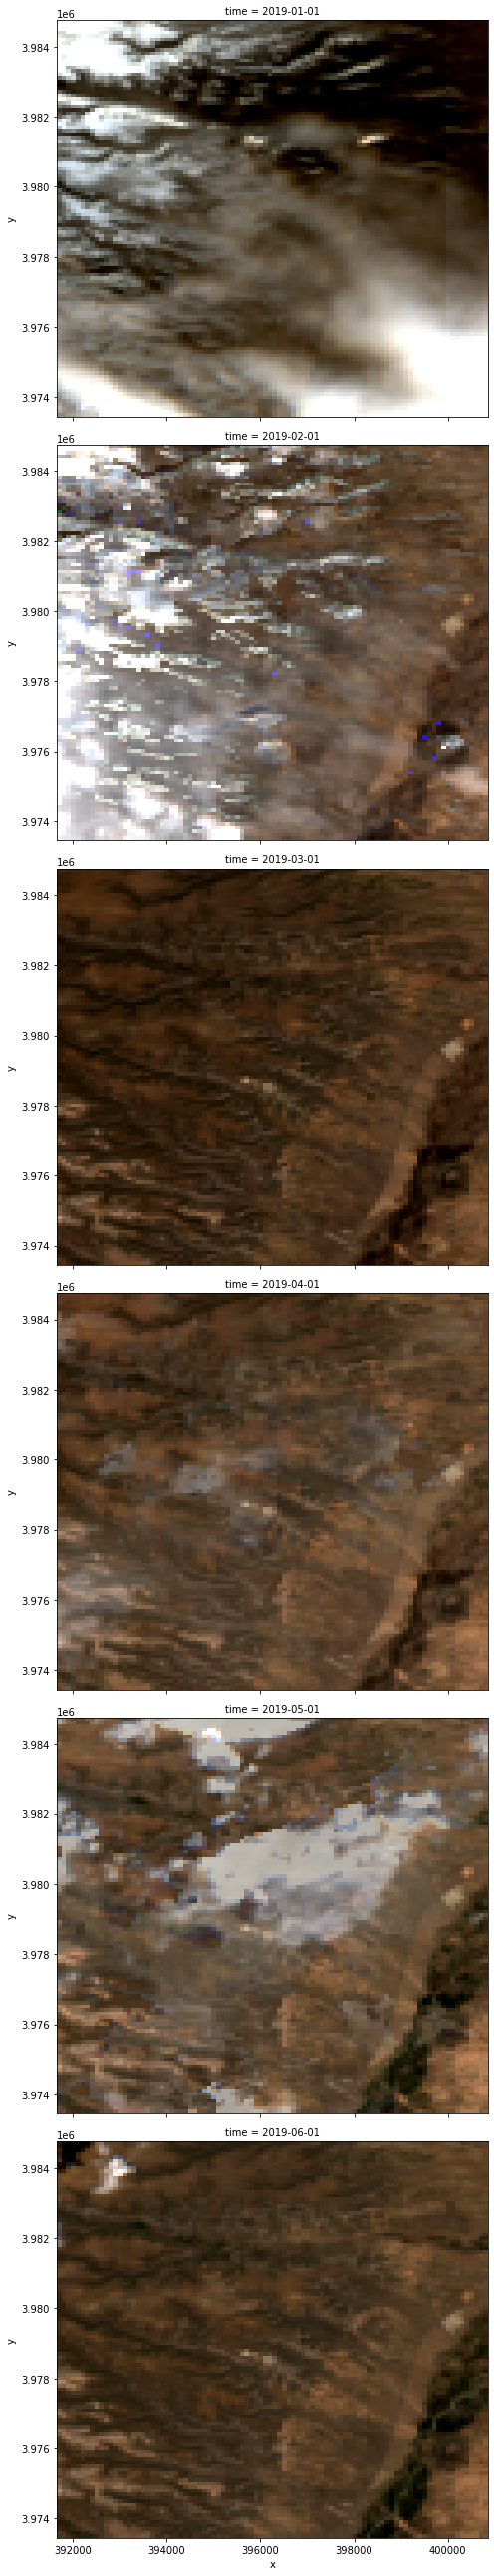

In [15]:
rgb_.plot.imshow(row="time", rgb="band", robust=True, size=6)